## 1. Google Play Store apps e reviews

Você está pensando em criar um aplicativo móvel, pois identificou uma ótima oportunidade para fazer uma grana extra, já que, dependendo do app, são fáceis de criar e podem ser bastante lucrativos.

Neste projeto, irei fazer uma análise do mercado de aplicativos Android comparando mais de 10 mil aplicativos do Google Play, com diferentes categorias.

<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>


Iremos trabalhar em cima de 2 datasets:


*   **apps.csv**: contém todos os detalhes dos aplicativos no Google Play. Temos 13 atributos descrevendo cada app.
*   **user_reviews.csv**: contém 100 avaliações para cada aplicativo. O texto em cada review foi pré-processado e atribuído com três novos atributos: sentimento (positivo, negativo ou neutro), polaridade de sentimento e subjetividade de sentimento.




In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.size)

# Have a look at a random sample of 5 entries
n = 5
apps.sample(n)

Total number of apps in the dataset =  135226


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4183,5134,Woodland AH,MEDICAL,NaN,0,NaN,50+,Free,0,Everyone,Medical,"February 2, 2018",300000.0.97,4.0.3 and up
6534,7590,Wrecker's Revenge - Gumball,FAMILY,4.3,2263,55M,"100,000+",Free,0,Everyone,Puzzle;Action & Adventure,"September 21, 2017",14.15,4.3 and up
2451,3152,Poynt,TRAVEL_AND_LOCAL,4.0,26665,10M,"5,000,000+",Free,0,Everyone,Travel & Local,"March 29, 2018",2.5.26,4.1 and up
7253,8337,DF-View,BUSINESS,NaN,0,15M,100+,Free,0,Everyone,Business,"January 4, 2016",1.0.9,4.0 and up
6433,7482,Tic Tac CK,FAMILY,5.0,3,13M,10+,Free,0,Everyone,Puzzle,"July 3, 2018",1.0,4.0.3 and up


## 2. Data cleaning

Os 3 atributos que iremos focar a partir de agora são: Instalações, Tamanho e Preço.

Se obervarmos atentamente os dados dessas colunas, podemos perceber que será necessário fazer uma limpeza nesses dados para que possam ser consumidos pelos códigos que escreveremos adiante.

Os caracteres ['+', ',' , 'M', '$'] precisam ser removidos, para que possamos converter esses dados em um tipo de dado numérico.

Vamos remover esses caracteres e transformar o tipo desses dados para numérico.



In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col]) 

## 3. Explorando as categorias dos aplicativos

Com mais de um bilhão de usuários ativos em 190 países em todo o mundo, o Google Play continua sendo uma importante plataforma de distribuição para criar uma audiência global.

Para as empresas colocarem seus aplicativos na frente dos usuários, é importante torná-los facilmente detectáveis no Google Play. 

Para melhorar a experiência geral de pesquisa, o Google introduziu o conceito de agrupar aplicativos em categorias.

Isso nos leva às seguintes perguntas:



*   Qual categoria tem a maior participação de aplicativos (ativos) no mercado?
*   Alguma categoria específica está dominando o mercado?
*   Quais categorias têm o menor número de aplicativos?

Veremos que existem 33 categorias de aplicativos exclusivas presentes em nosso conjunto de dados. 

Os aplicativos das categorias Família e Jogo têm a maior prevalência do mercado. 

Curiosamente, os aplicativos Ferramentas, Negócios e Medicina também são bastante requisitadas.

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

layout = go.Layout(
    title = "Quantidade de aplicativos em cada categoria"
)

plotly.offline.iplot({'data': data, 'layout': layout})

Number of categories =  33


## 4. Distribuição das classificações de aplicativos

Agora que já visualizamos a participação de cada categoria nesse mercado, vamos analisar o desempenho desses aplicativos.

As classificações dos aplicativos (em uma escala de 1 a 5) afetam a capacidade de descoberta e a imagem geral da marca da empresa. 

As classificações são um indicador chave de desempenho de um aplicativo.

Da nossa pesquisa, descobrimos que a classificação médio de classificações em todas as categorias de aplicativos é 4,17. 

A plotagem do histograma é inclinada para a direita, indicando que a maioria dos aplicativos possuem uma classificação alta.

In [4]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }],
          'title':'Distribuição das classificações dos aplicativos',
          'xaxis_title':'Classificação'
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 5. Tamanho e preço do app

Vamos agora examinar o tamanho e o preço do aplicativo. 

Para o tamanho, se o aplicativo móvel for muito grande, pode ser difícil e/ou caro para o usuário fazer o download. 

Os longos tempos de download podem desativar os usuários antes mesmo de experimentar seu aplicativo para dispositivos móveis. 

Além disso, o dispositivo de cada usuário possui uma quantidade finita de espaço em disco. 

Por preço, alguns usuários esperam que seus aplicativos sejam gratuitos ou baratos. 

Esses problemas aumentam se o mundo em desenvolvimento fizer parte do seu mercado-alvo; especialmente devido à velocidade da internet, poder aquisitivo e taxas de câmbio.

Como podemos efetivamente apresentar estratégias para dimensionar e precificar nosso aplicativo?

* O tamanho de um aplicativo afeta sua classificação?

* Os usuários realmente se preocupam com aplicativos pesados do sistema ou preferem aplicativos leves?

* O preço de um aplicativo afeta sua classificação?

* Os usuários sempre preferem aplicativos gratuitos a aplicativos pagos?

Constatamos que a maioria dos aplicativos com melhor classificação (classificação acima de 4) varia de 2 MB a 20 MB. 

Também descobrimos que a grande maioria dos aplicativos custa menos de $ 10.

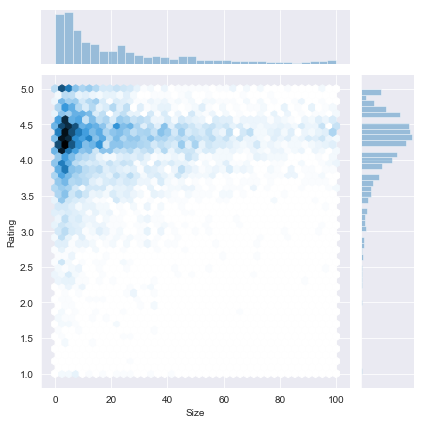

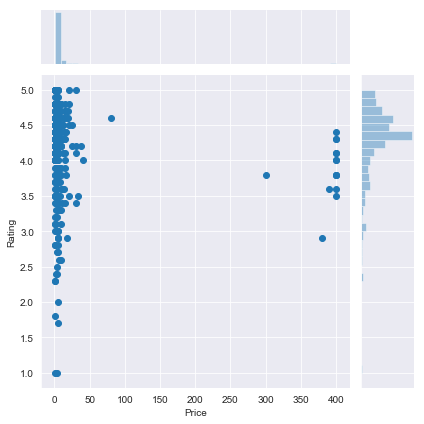

In [6]:
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Price'] > 0]

# Plot price vs. rating
sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], data = paid_apps)

## 6. Relação entre categoria e preço do aplicativo

Então agora vem a parte mais difícil. 

Como as empresas e os desenvolvedores devem cobrar pelos seus aplicativos? 

Quais estratégias de monetização as empresas podem usar para maximizar o lucro? 

Os custos dos aplicativos são amplamente baseados em recursos, complexidade e plataforma.

Há muitos fatores a serem considerados ao selecionar a estratégia de preços certa para seu aplicativo para dispositivos móveis. 

É importante considerar o quanto seu cliente está disposto a pagar pelo seu aplicativo. 

Além disso, é muito comum os potenciais clientes excluirem um aplicativo que baixaram pois estão recebendo muitos anúncios.

Diferentes categorias exigem diferentes faixas de preço.

Alguns aplicativos simples e usados diariamente, como o aplicativo da calculadora, provavelmente devem ser mantidos gratuitos. 

No entanto, faria sentido cobrar por um aplicativo médico altamente especializado que auxilia o diagnóstico de alguma doença. 

Abaixo, vemos que os aplicativos Médico e Familiar são os mais caros. 

Alguns aplicativos médicos custam até $80! 

Todos os aplicativos de jogos têm preços aproximadamente abaixo de $20.


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


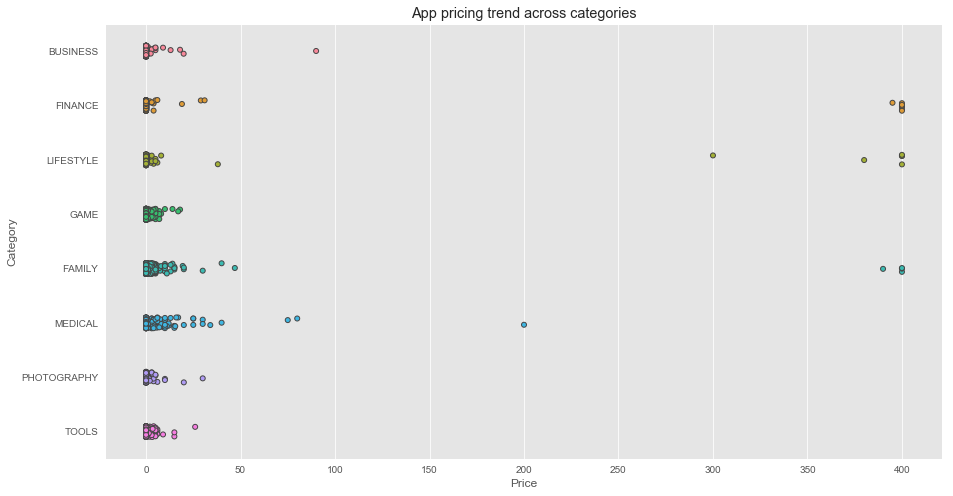

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = apps[apps['Price'] > 200][['Category', 'App', 'Price']]
apps_above_200

## 7. Filtre aplicativos "indesejados"

Parece que vários aplicativos realmente caros são "lixo". 

Ou seja, aplicativos que realmente não têm um objetivo. 

Alguns desenvolvedores de aplicativos podem criar um aplicativo chamado I Am Rich Premium ou o aplicativo mais caro (H) apenas por brincadeira ou para testar suas habilidades de desenvolvimento de aplicativos. 

Alguns desenvolvedores até fazem isso com intenções maliciosas e tentam ganhar dinheiro esperando que as pessoas cliquem acidentalmente na compra do aplicativo na loja.

Vamos filtrar esses aplicativos indesejados e refazer nossa visualização. 

A distribuição de aplicativos abaixo de $20 fica mais clara.



Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

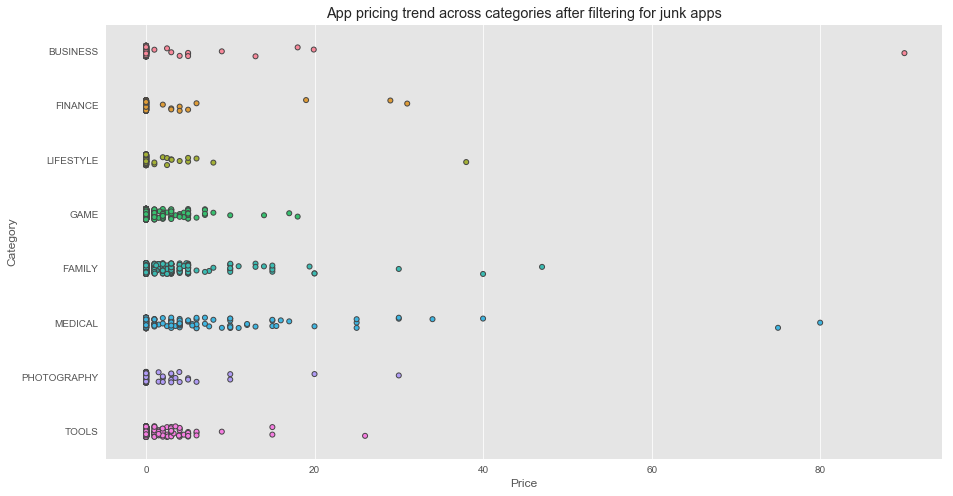

In [7]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Aplicativos pagos vs aplicativos gratuitos

Hoje, para aplicativos na Play Store, existem cinco tipos de estratégias de preços: grátis, freemium, pago, paymium e assinatura. 

Vamos nos concentrar apenas em aplicativos gratuitos e pagos. 

Algumas características dos aplicativos gratuitos são:

* Grátis para download.
* A principal fonte de renda geralmente vem de anúncios.
* Muitas vezes, criado por empresas que têm outros produtos e o aplicativo serve como uma extensão desses produtos.
* Pode servir como uma ferramenta para retenção, comunicação e atendimento ao cliente.

Algumas características dos aplicativos pagos são:

* Os usuários são solicitados a pagar uma vez pelo download e uso do aplicativo.
* O usuário não pode realmente ter uma idéia do aplicativo antes de comprá-lo.

Aplicativos pagos são instalados tanto quanto aplicativos gratuitos? 

Acontece que os aplicativos pagos têm um número relativamente menor de instalações do que os aplicativos gratuitos, embora a diferença não seja tão acentuada quanto você pode ter imaginado!



In [8]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Número de downloads de aplicativos pagos vs gratuitos",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Análise de sentimento dos comentários dos usuários

Os dados de reviews de usuários é um ótimo indicador de como as pessoas se sentem sobre seu produto, marca ou serviço e podem ser feitos usando uma técnica chamada análise de sentimentos. 

As análises de usuários de aplicativos podem ser analisadas para identificar se o clima é positivo, negativo ou neutro em relação a esse aplicativo. 

Por exemplo, palavras positivas em uma review de aplicativo podem incluir palavras como 'incrível', 'amigável', 'bom' e 'ótimo'. 

Palavras negativas podem ser aparecer como 'malware', 'ódio','problema', 'reembolso' ou algum palavrão.

Ao plotar as pontuações de polaridade de sentimento das análises de usuários de aplicativos pagos e gratuitos, observamos que os aplicativos gratuitos recebem muitos comentários severos, conforme indicado pelos valores no eixo y negativo. 

As análises de aplicativos pagos parecem nunca ser extremamente negativas. 

Isso pode indicar algo sobre a qualidade do aplicativo, ou seja, os aplicativos pagos são de qualidade superior aos aplicativos gratuitos em média. 

A pontuação média de polaridade para aplicativos pagos é um pouco maior que os aplicativos gratuitos, convergindo com nossa observação anterior.


In [8]:
# Read in the user reviews
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

trace0 = go.Box(
    # Data for paid apps
    y=merged_df[merged_df['Type'] == 'Paid']['Sentiment_Polarity'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=merged_df[merged_df['Type'] == 'Free']['Sentiment_Polarity'],
    name = 'Free'
)

layout = go.Layout(
    title = "Distribuição da Polaridade do Sentimento"
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})